In [1183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

**1. Load the dataset** 

In [1184]:
park = pd.read_csv("Data-Parkinsons.csv")

In [1185]:
park.shape

(195, 24)

In [1186]:
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2. Studying the data attributes

In [1187]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [1188]:
park.isnull().values.any()

False

In [1189]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


> The following can be understood from initial data analysis
* There are 195 entries.
* There are no null values.
* There are 22 float,1 integer,1 object column.
* The shape of the data is 8 rows and 23 columns.

## 3. Univariate analysis

In [1190]:
park["MDVP:Fo(Hz)"].describe()

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64

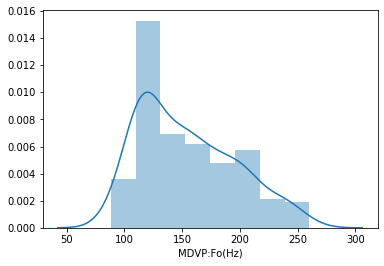

In [1191]:
sns.distplot(park["MDVP:Fo(Hz)"])

In [1192]:
park["MDVP:Fhi(Hz)"].describe()

count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64

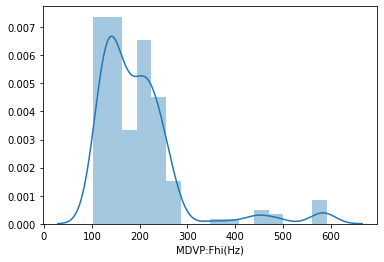

In [1193]:
sns.distplot(park["MDVP:Fhi(Hz)"])

In [1194]:
park["MDVP:Flo(Hz)"].describe()

count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64

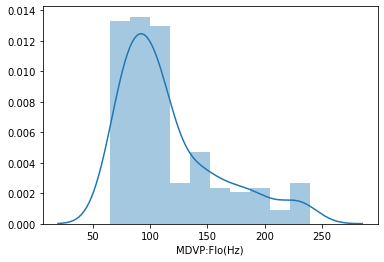

In [1195]:
sns.distplot(park["MDVP:Flo(Hz)"])

In [1196]:
park["MDVP:Jitter(%)"].describe()

count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: MDVP:Jitter(%), dtype: float64

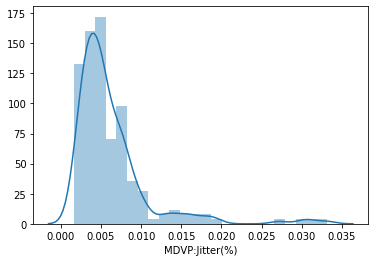

In [1197]:
sns.distplot(park["MDVP:Jitter(%)"])

In [1198]:
park["MDVP:Jitter(Abs)"].describe()

count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64

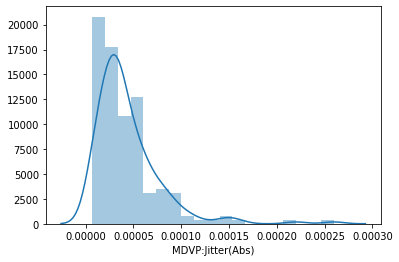

In [1199]:
sns.distplot(park["MDVP:Jitter(Abs)"])

In [1200]:
park["MDVP:RAP"].describe()

count    195.000000
mean       0.003306
std        0.002968
min        0.000680
25%        0.001660
50%        0.002500
75%        0.003835
max        0.021440
Name: MDVP:RAP, dtype: float64

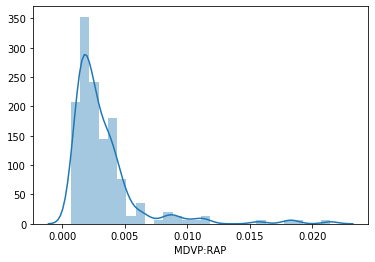

In [1201]:
sns.distplot(park["MDVP:RAP"])

In [1202]:
park["MDVP:PPQ"].describe()

count    195.000000
mean       0.003446
std        0.002759
min        0.000920
25%        0.001860
50%        0.002690
75%        0.003955
max        0.019580
Name: MDVP:PPQ, dtype: float64

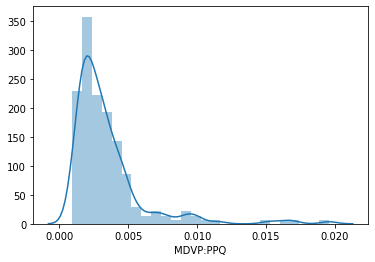

In [1203]:
sns.distplot(park["MDVP:PPQ"])

In [1204]:
park["Jitter:DDP"].describe()

count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: Jitter:DDP, dtype: float64

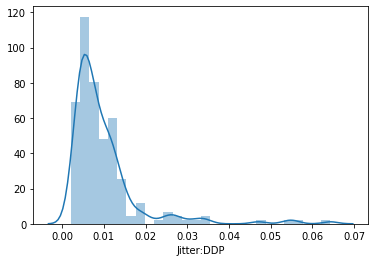

In [1205]:
sns.distplot(park["Jitter:DDP"])

In [1206]:
park["MDVP:Shimmer"].describe()

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: MDVP:Shimmer, dtype: float64

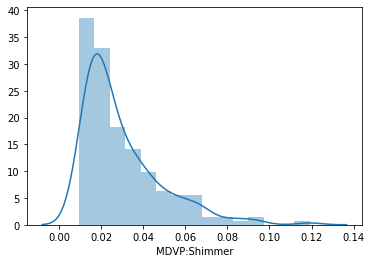

In [1207]:
sns.distplot(park["MDVP:Shimmer"])

In [1208]:
park["MDVP:Shimmer(dB)"].describe()

count    195.000000
mean       0.282251
std        0.194877
min        0.085000
25%        0.148500
50%        0.221000
75%        0.350000
max        1.302000
Name: MDVP:Shimmer(dB), dtype: float64

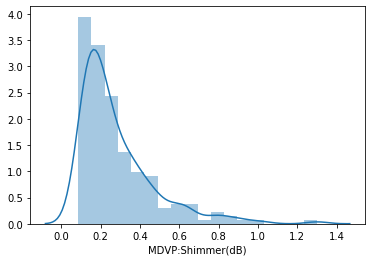

In [1209]:
sns.distplot(park["MDVP:Shimmer(dB)"])

In [1210]:
park["Shimmer:APQ3"].describe()

count    195.000000
mean       0.015664
std        0.010153
min        0.004550
25%        0.008245
50%        0.012790
75%        0.020265
max        0.056470
Name: Shimmer:APQ3, dtype: float64

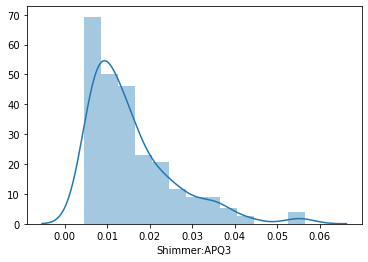

In [1211]:
sns.distplot(park["Shimmer:APQ3"])

In [1212]:
park["Shimmer:APQ5"].describe()

count    195.000000
mean       0.017878
std        0.012024
min        0.005700
25%        0.009580
50%        0.013470
75%        0.022380
max        0.079400
Name: Shimmer:APQ5, dtype: float64

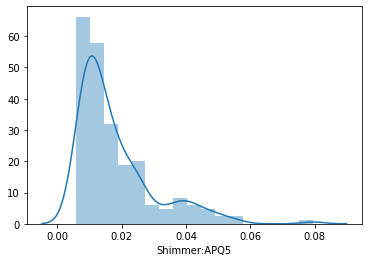

In [1213]:
sns.distplot(park["Shimmer:APQ5"])

In [1214]:
park["MDVP:APQ"].describe()

count    195.000000
mean       0.024081
std        0.016947
min        0.007190
25%        0.013080
50%        0.018260
75%        0.029400
max        0.137780
Name: MDVP:APQ, dtype: float64

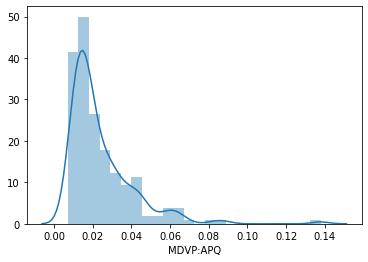

In [1215]:
sns.distplot(park["MDVP:APQ"])

In [1216]:
park["Shimmer:DDA"].describe()

count    195.000000
mean       0.046993
std        0.030459
min        0.013640
25%        0.024735
50%        0.038360
75%        0.060795
max        0.169420
Name: Shimmer:DDA, dtype: float64

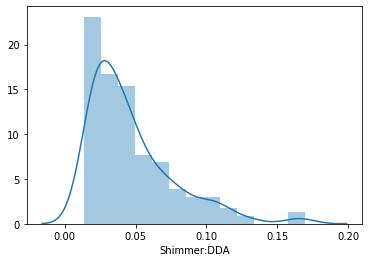

In [1217]:
sns.distplot(park["Shimmer:DDA"])

In [1218]:
park["NHR"].describe()

count    195.000000
mean       0.024847
std        0.040418
min        0.000650
25%        0.005925
50%        0.011660
75%        0.025640
max        0.314820
Name: NHR, dtype: float64

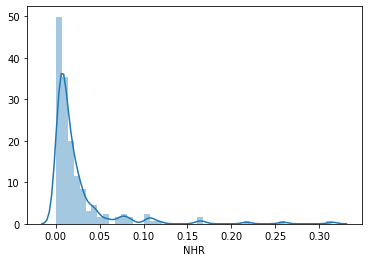

In [1219]:
sns.distplot(park["NHR"])

In [1220]:
park["HNR"].describe()

count    195.000000
mean      21.885974
std        4.425764
min        8.441000
25%       19.198000
50%       22.085000
75%       25.075500
max       33.047000
Name: HNR, dtype: float64

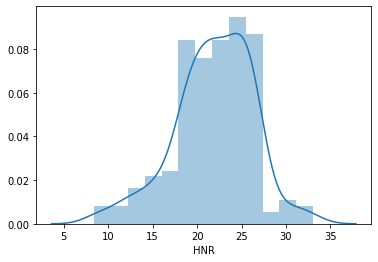

In [1221]:
sns.distplot(park["HNR"])

In [1222]:
park["status"].describe()

count    195.000000
mean       0.753846
std        0.431878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

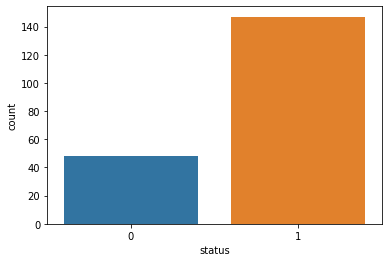

In [1223]:
sns.countplot(park["status"])

In [1224]:
park["RPDE"].describe()

count    195.000000
mean       0.498536
std        0.103942
min        0.256570
25%        0.421306
50%        0.495954
75%        0.587562
max        0.685151
Name: RPDE, dtype: float64

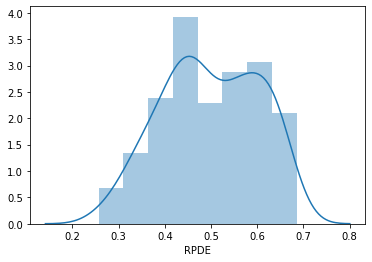

In [1225]:
sns.distplot(park["RPDE"])

In [1226]:
park["DFA"].describe()

count    195.000000
mean       0.718099
std        0.055336
min        0.574282
25%        0.674758
50%        0.722254
75%        0.761881
max        0.825288
Name: DFA, dtype: float64

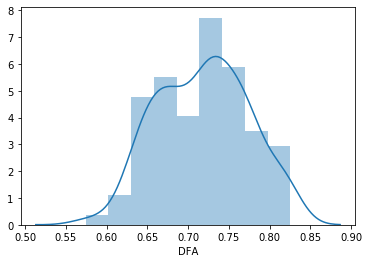

In [1227]:
sns.distplot(park["DFA"])

In [1228]:
park["spread1"].describe()

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64

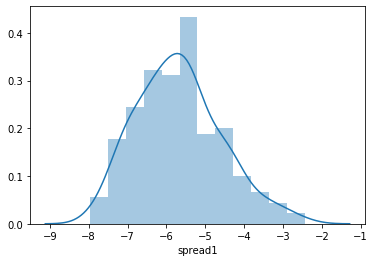

In [1229]:
sns.distplot(park["spread1"])

In [1230]:
park["spread2"].describe()

count    195.000000
mean       0.226510
std        0.083406
min        0.006274
25%        0.174351
50%        0.218885
75%        0.279234
max        0.450493
Name: spread2, dtype: float64

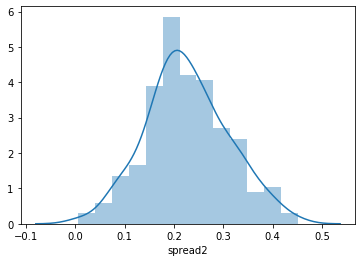

In [1231]:
sns.distplot(park["spread2"])

In [1232]:
park["D2"].describe()

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: D2, dtype: float64

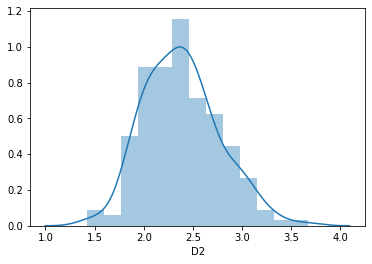

In [1233]:
sns.distplot(park["D2"])

In [1234]:
park["PPE"].describe()

count    195.000000
mean       0.206552
std        0.090119
min        0.044539
25%        0.137451
50%        0.194052
75%        0.252980
max        0.527367
Name: PPE, dtype: float64

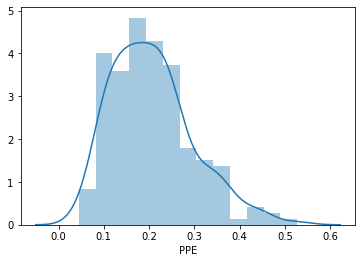

In [1235]:
sns.distplot(park["PPE"])

> From the univariate analysis, the following can be inferred
* From count plot out of 195 patients checked around 140 patients are suspected to have Parkinson.
* The columns D2,spread2,spread1 have a normal bell-shaped curve.
* The columns DFA, HNR are skewed towards the right.
* The rest of all columns are skewed towards left.
* The spread, mean, IQR, etc have been calculated.

## Bivariate Analysis

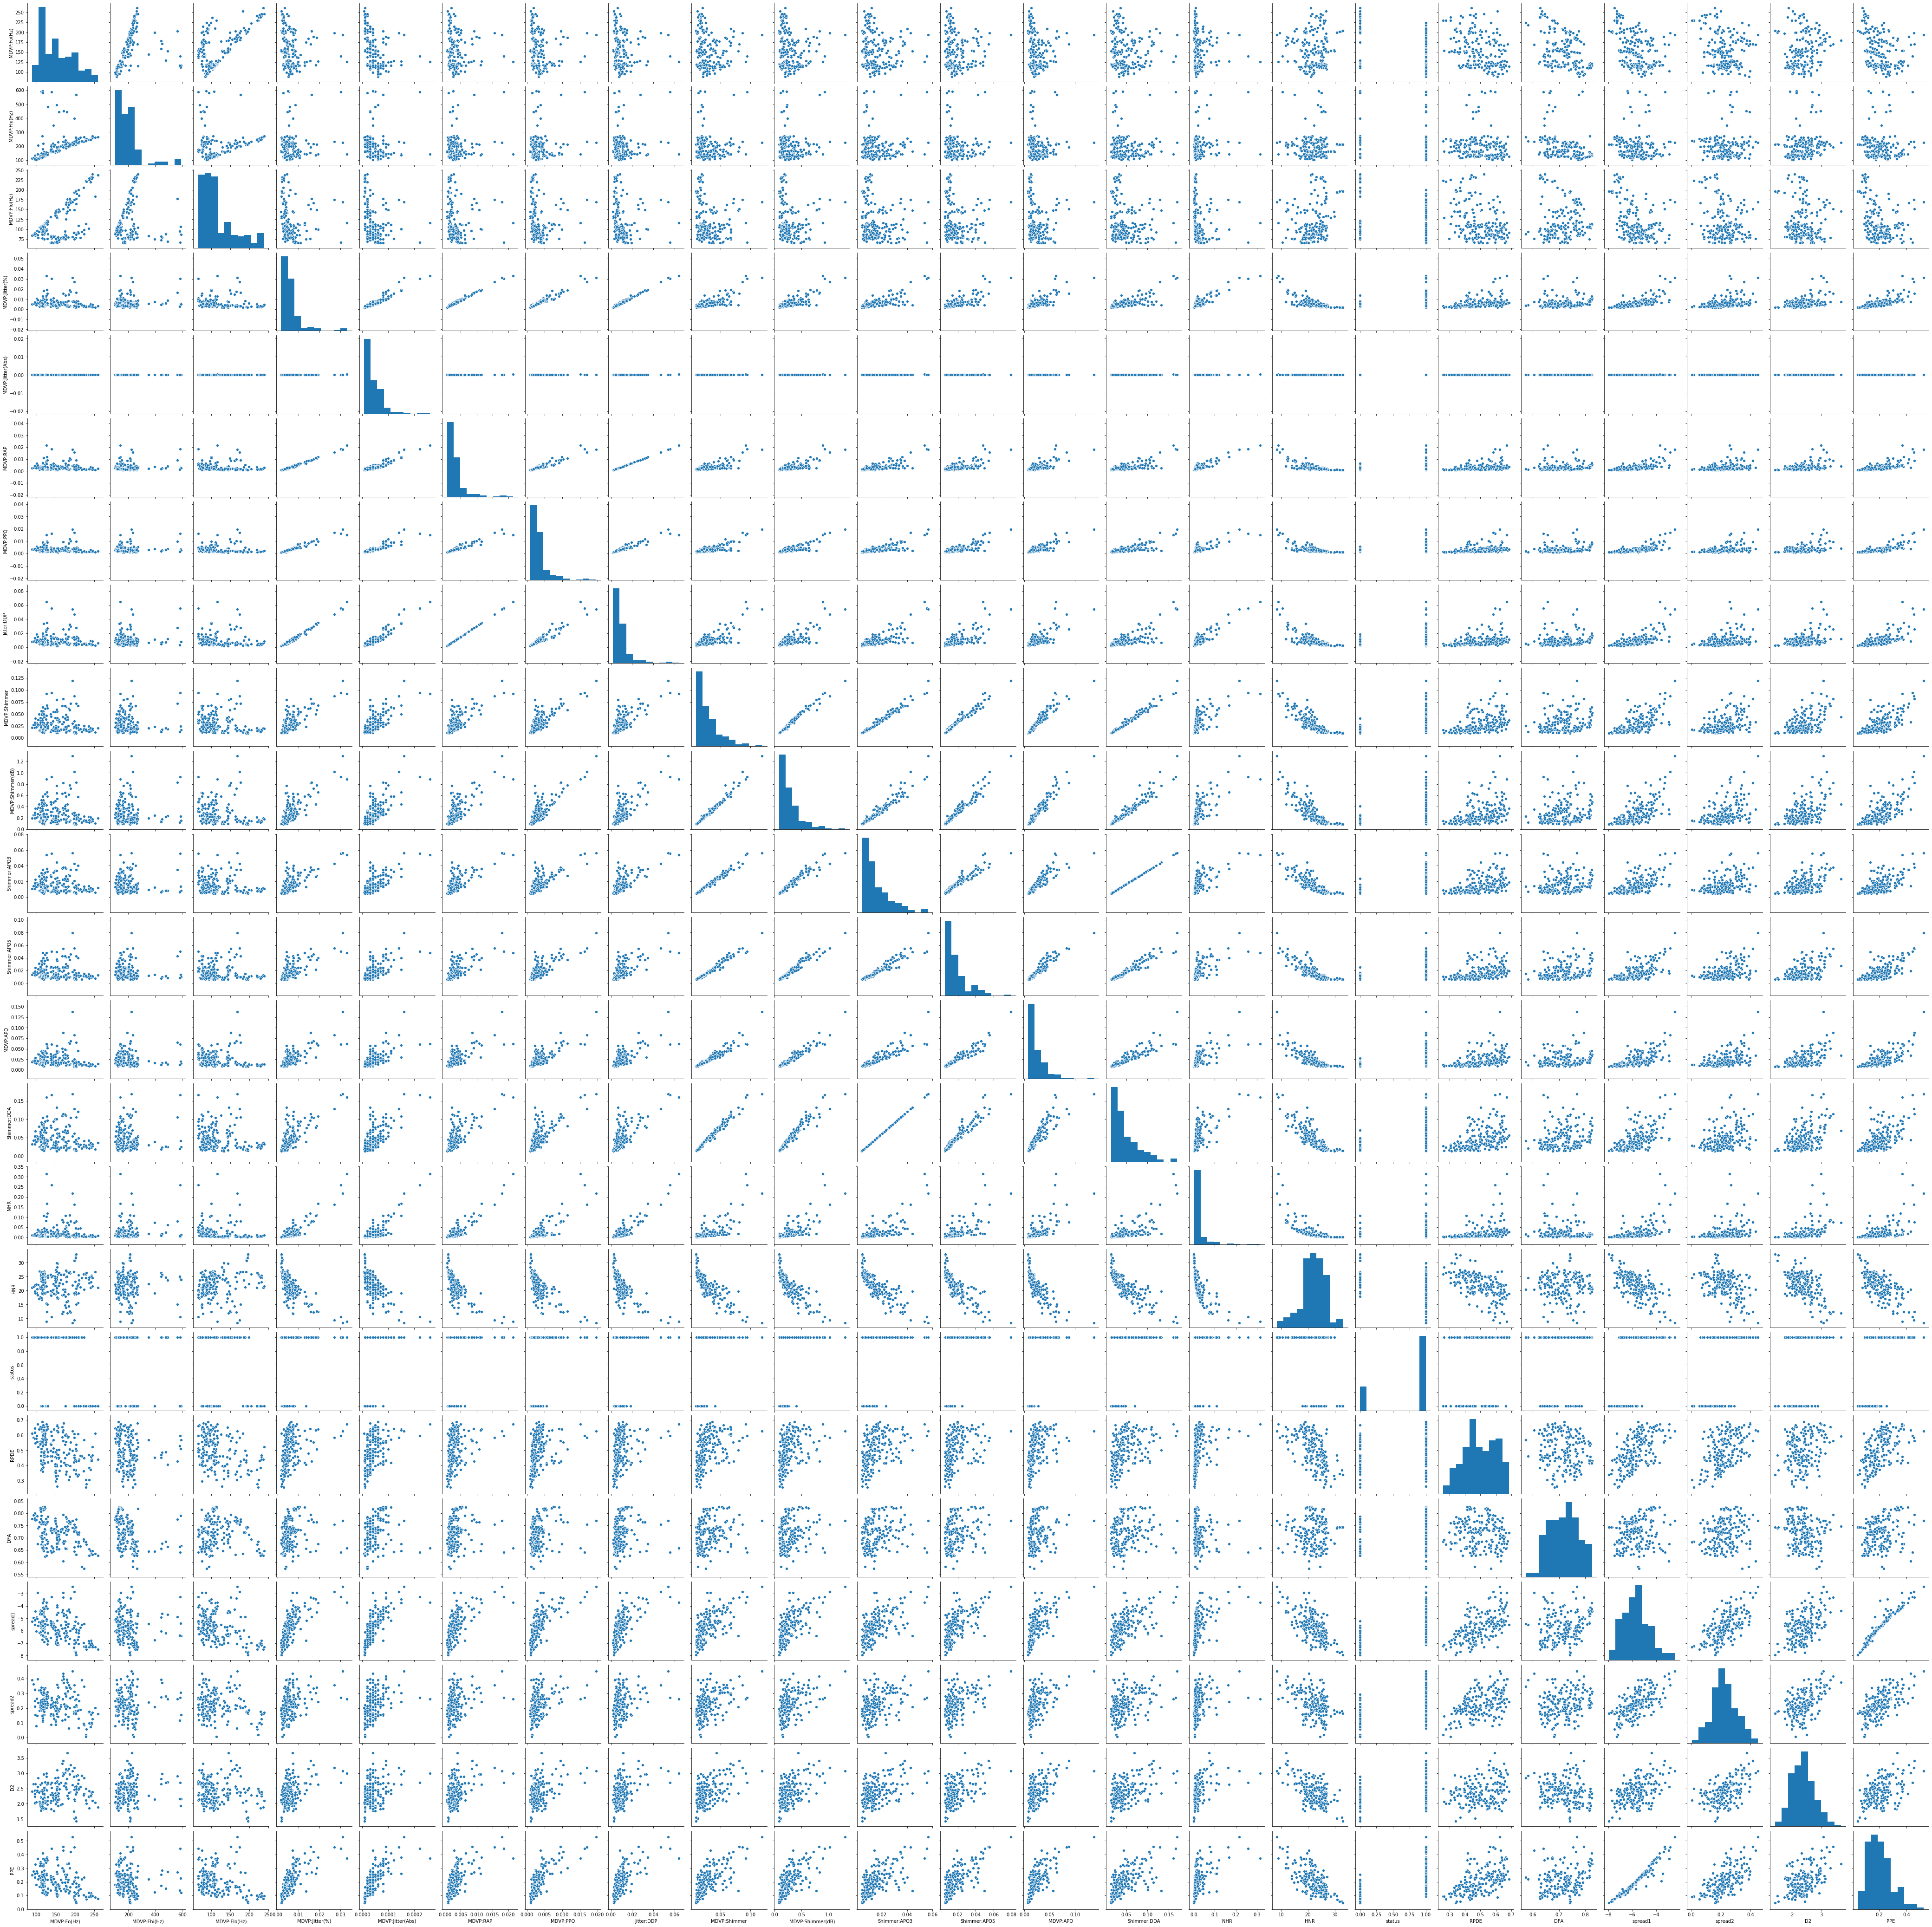

In [1236]:
sns.pairplot(park[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)",
                  "MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer",
                  "MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR",
                  "HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"]])

In [1237]:
core=park.corr()
park.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


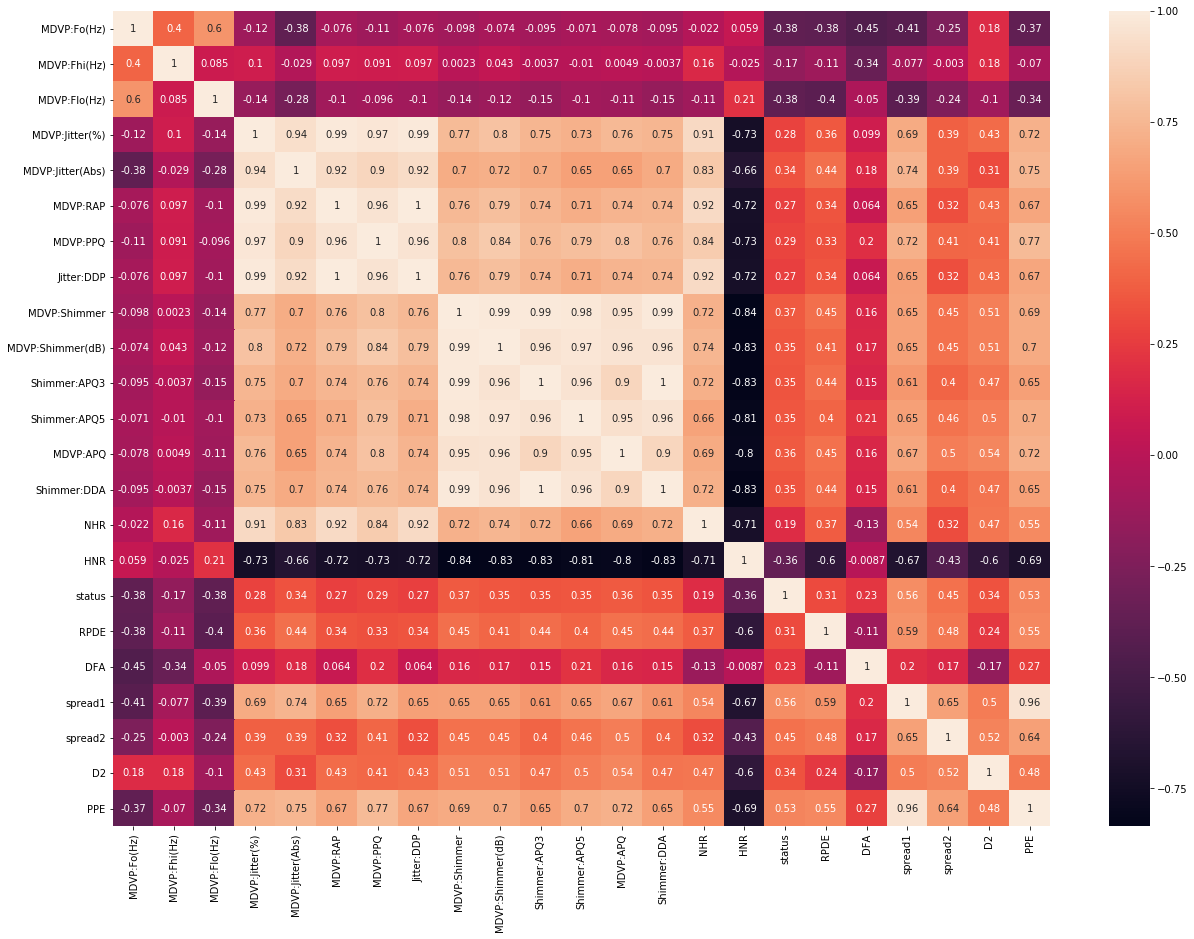

In [1238]:
plt.figure(figsize = (21,15))
sns.heatmap(core,annot=True)

> From the bivariate analysis, the following can be inferred
* Around 10 variables have a strong correlation.
* The pair plot of all the variables is plotted.
* The columns Jitter: DDP, DFA, MDVP: Fhi, NHR are deleted due to least significant of the variables.

In [1239]:
park.drop("name",axis=1,inplace=True)
park.drop("Jitter:DDP",axis=1,inplace=True)
park.drop("DFA",axis=1,inplace=True)
park.drop("MDVP:Fhi(Hz)",axis=1,inplace=True)
park.drop("NHR",axis=1,inplace=True)

### 4. Split the dataset into training and test set in the ratio of 70:30 

In [1240]:
X= park.drop("status",axis=1)
Y= park["status"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
x_train.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
42,237.226,225.227,0.00298,0.00001,0.00169,0.00182,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,22.736,0.305062,-7.310550,0.098648,2.416838,0.095032
17,168.778,75.603,0.00718,0.00004,0.00284,0.00387,0.03327,0.348,0.01441,0.01893,0.03430,0.04322,20.376,0.631099,-2.931070,0.434326,3.007463,0.430788
5,120.552,113.787,0.00968,0.00008,0.00463,0.00750,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,21.378,0.415564,-4.242867,0.299111,2.187560,0.357775
120,128.940,88.251,0.00581,0.00005,0.00241,0.00314,0.02008,0.221,0.00849,0.01117,0.01734,0.02548,24.743,0.487756,-6.186128,0.279933,2.686240,0.152428
98,125.791,96.206,0.01378,0.00011,0.00826,0.00655,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,15.433,0.571010,-5.159169,0.202146,2.441612,0.260375


In [1241]:
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
0,237.226,225.227,0.00298,0.00001,0.00169,0.00182,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,22.736,0.305062,-7.310550,0.098648,2.416838,0.095032
1,168.778,75.603,0.00718,0.00004,0.00284,0.00387,0.03327,0.348,0.01441,0.01893,0.03430,0.04322,20.376,0.631099,-2.931070,0.434326,3.007463,0.430788
2,120.552,113.787,0.00968,0.00008,0.00463,0.00750,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,21.378,0.415564,-4.242867,0.299111,2.187560,0.357775
3,128.940,88.251,0.00581,0.00005,0.00241,0.00314,0.02008,0.221,0.00849,0.01117,0.01734,0.02548,24.743,0.487756,-6.186128,0.279933,2.686240,0.152428
4,125.791,96.206,0.01378,0.00011,0.00826,0.00655,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,15.433,0.571010,-5.159169,0.202146,2.441612,0.260375


### 6. Train at least 3 standard classification algorithms 

In [1242]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0 -0.012963 -0.001277  0.007513  0.000066  0.00741  0.006545  0.110842   

          7         8         9        10        11        12       13  \
0  1.049264  0.059919  0.067636  0.086584  0.179732  0.081816  0.53297   

         14        15        16        17  intercept  
0  0.952267  0.445513  2.576728  0.561887   0.754797  


In [1243]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7966101694915254


In [1244]:
confusion_matrix(y_test, y_predict)

array([[ 9, 10],
       [ 2, 38]], dtype=int64)

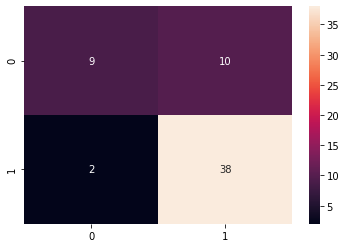

In [1245]:
cm=confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [1246]:
print("Classification Report")
print(metrics.classification_report(y_test,y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.95      0.86        40
           0       0.82      0.47      0.60        19

    accuracy                           0.80        59
   macro avg       0.80      0.71      0.73        59
weighted avg       0.80      0.80      0.78        59



## KNN Classifier

In [1247]:
park.groupby(["status"]).count()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147


In [1248]:
XScaled  = X.apply(zscore)  
XScaled.describe()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR,RPDE,spread1,spread2,D2,PPE
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-2.277381e-18,6.148928e-17,-2.127927e-17,2.562053e-18,-1.380662e-16,9.351494e-17,2.829645e-16,-1.369275e-16,8.255505e-17,1.930080e-16,-8.824850e-17,-1.577086e-16,9.123756e-16,-1.913000e-16,1.184451e-15,-1.429056e-16,-6.117614e-16,-2.960595e-17
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.596162e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-1.072340e+00,-1.014787e+00,-1.097467e+00,-1.015461e+00,-9.993055e-01,-1.097815e+00,-3.045707e+00,-2.333888e+00,-2.097268e+00,-2.647338e+00,-2.510472e+00,-1.802384e+00
25%,-8.879183e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-7.020291e-01,-6.881025e-01,-7.326044e-01,-6.919345e-01,-6.508513e-01,-7.326182e-01,-6.089102e-01,-7.449206e-01,-7.041503e-01,-6.269844e-01,-7.404100e-01,-7.687420e-01
50%,-1.317379e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-3.583019e-01,-3.151160e-01,-2.838083e-01,-3.675741e-01,-3.444009e-01,-2.841460e-01,4.508553e-02,-2.490033e-02,-3.353960e-02,-9.166005e-02,-5.315145e-02,-1.390580e-01
75%,6.913210e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,4.346898e-01,3.485429e-01,4.543106e-01,3.753694e-01,3.146448e-01,4.543110e-01,7.225273e-01,8.587132e-01,5.869042e-01,6.337615e-01,6.668912e-01,5.165137e-01
max,2.564598e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,4.751617e+00,5.246243e+00,4.029374e+00,5.129875e+00,6.726438e+00,4.029746e+00,2.528321e+00,1.800007e+00,2.989093e+00,2.692370e+00,3.376831e+00,3.569059e+00


In [1249]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=42)

In [1250]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [1251]:
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [1252]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test)

0.9152542372881356

In [1253]:
a=confusion_matrix(Y_test, predicted_labels)
print("confusion matirx of KNN classifier = \n",a)

confusion matirx of KNN classifier = 
 [[10  5]
 [ 0 44]]


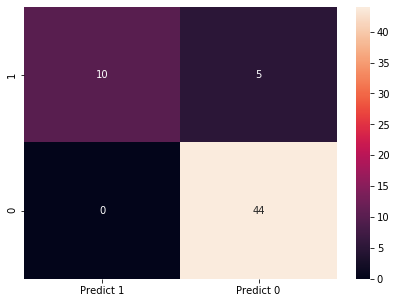

In [1254]:
knnm=metrics.confusion_matrix(Y_test, predicted_labels)
knn_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [1255]:
print("Classification Report")
print(metrics.classification_report(Y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        44
           0       1.00      0.67      0.80        15

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



## SVM classifier

In [1256]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [1257]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)

prediction = svc_model .predict(x_test)

In [1258]:
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.8455882352941176
0.864406779661017


In [1259]:
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))

Confusion Matrix:
 [[ 8  7]
 [ 1 43]]


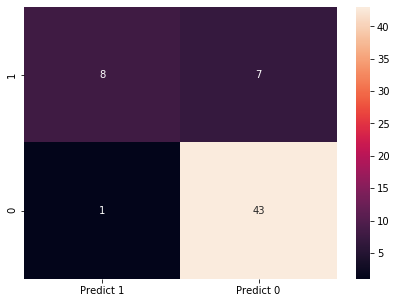

In [1260]:
knnm=metrics.confusion_matrix(y_test,prediction)
knn_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [1261]:
print("Classification Report")
print(metrics.classification_report(y_test,prediction, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.98      0.91        44
           0       0.89      0.53      0.67        15

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59



In [1262]:
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1263]:
svc_model  = SVC(kernel='poly')
svc_model.fit(x_train, y_train)

prediction = svc_model.predict(x_test)

print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.8529411764705882
0.8305084745762712


In [1264]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(x_train, y_train)

prediction = svc_model.predict(x_test)

print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.7573529411764706
0.7457627118644068


### 8.Ensemble model 

## Decision Tree

In [1265]:
feature_cols = ['MDVP:Fo(Hz)',' MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Shimmer',
                'MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','HNR','RPDE','spread1','spread2','D2','PPE']
clf = DecisionTreeClassifier()

clf=clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [1266]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864406779661017


In [1267]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[11  4]
 [ 4 40]]


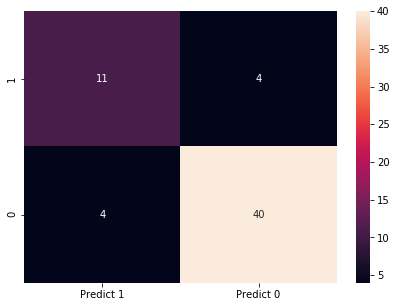

In [1268]:
tree=metrics.confusion_matrix(y_test,y_pred)
tree_m = pd.DataFrame(tree, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(tree_m, annot=True)

In [1269]:
print("Classification Report")
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        44
           0       0.73      0.73      0.73        15

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59



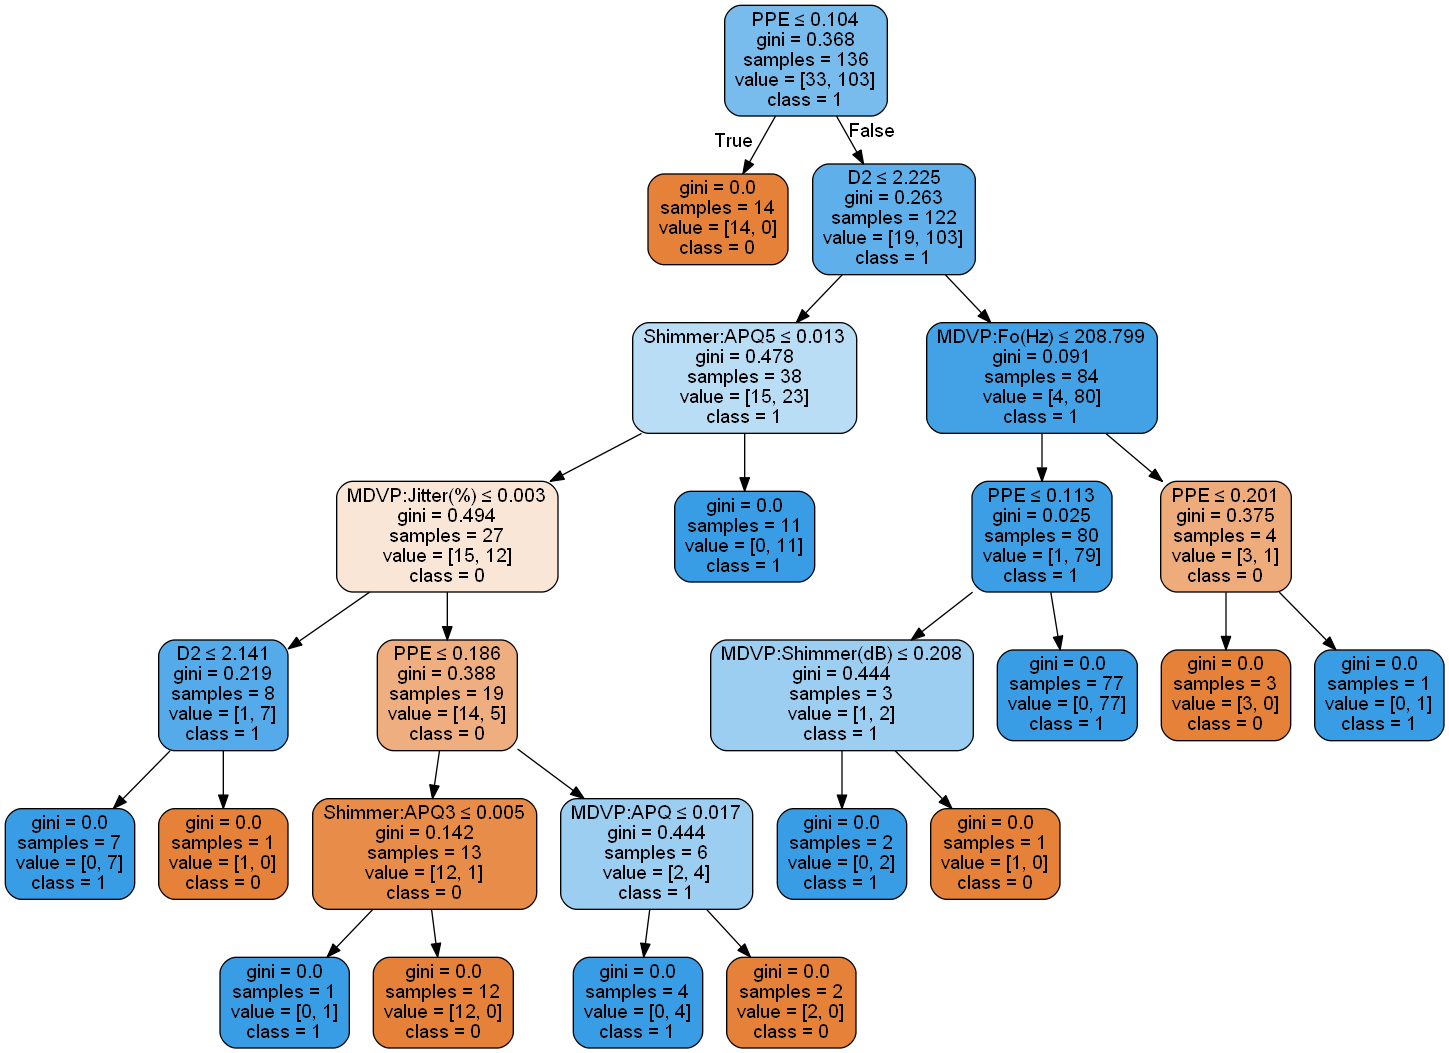

In [1270]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('park.png')
Image(graph.create_png())

## Pruned decision Tree

In [1271]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.847457627118644


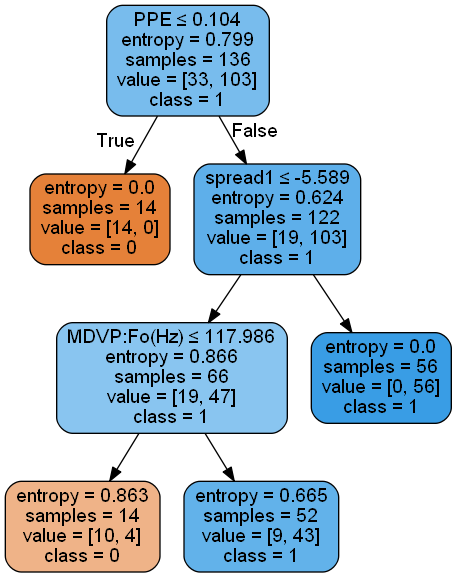

In [1272]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('park1.png')
Image(graph.create_png())

## Random Forest

In [1273]:
rf = RandomForestClassifier(n_estimators = 70,criterion="entropy")
rf = rf.fit(x_train, y_train)

In [1274]:
predrf= rf.predict(x_test)
accrf = accuracy_score(y_test, predrf)
print(accrf)

0.8983050847457628


In [1275]:
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))

Confusion Matrix:
 [[11  4]
 [ 2 42]]


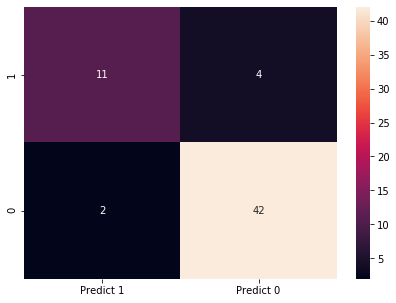

In [1276]:
rf1=metrics.confusion_matrix(y_test,predrf)
rf1_m = pd.DataFrame(rf1, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(rf1_m, annot=True)

In [1277]:
print("Classification Report")
print(metrics.classification_report(y_test,predrf, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        44
           0       0.85      0.73      0.79        15

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



## AdaBoost

In [1278]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864406779661017


In [1279]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[ 9  6]
 [ 2 42]]


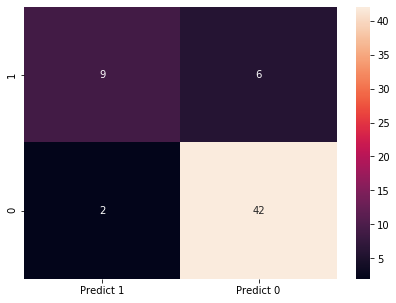

In [1280]:
ab=metrics.confusion_matrix(y_test,y_pred)
ab_m = pd.DataFrame(ab, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(ab_m, annot=True)

In [1281]:
print("Classification Report")
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.95      0.91        44
           0       0.82      0.60      0.69        15

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



## Bagging Classifier

In [1282]:
bag = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bag= bag.fit(x_train, y_train)

In [1283]:
predBAG =bag.predict(x_test)
accBAG = accuracy_score(y_test, predBAG)
print(accBAG)

0.8813559322033898


In [1284]:
print("Confusion Matrix:\n",confusion_matrix(y_test,predBAG))

Confusion Matrix:
 [[10  5]
 [ 2 42]]


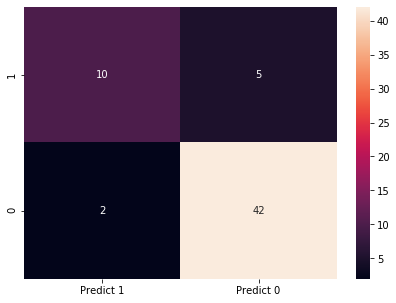

In [1285]:
bag=metrics.confusion_matrix(y_test,predBAG)
bag_m = pd.DataFrame(bag, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(bag_m, annot=True)

In [1286]:
print("Classification Report")
print(metrics.classification_report(y_test,predBAG, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           0       0.83      0.67      0.74        15

    accuracy                           0.88        59
   macro avg       0.86      0.81      0.83        59
weighted avg       0.88      0.88      0.88        59



## GradientBoost Classifier

In [1287]:
grad = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=42)
grad = grad.fit(x_train, y_train)

In [1288]:
predgrad =grad.predict(x_test)
accgrad = accuracy_score(y_test, predgrad)
print(accgrad)

0.8983050847457628


In [1289]:
print("Confusion Matrix:\n",confusion_matrix(y_test,predgrad))

Confusion Matrix:
 [[11  4]
 [ 2 42]]


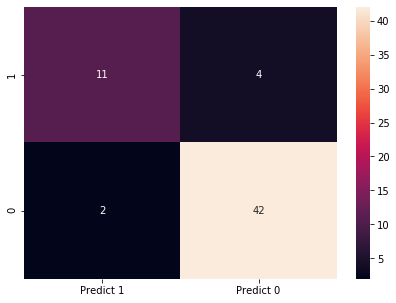

In [1290]:
grad=metrics.confusion_matrix(y_test,predgrad)
grad_m = pd.DataFrame(grad, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(grad_m, annot=True)

In [1291]:
print("Classification Report")
print(metrics.classification_report(y_test,predgrad, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        44
           0       0.85      0.73      0.79        15

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



### 7.meta-classifier

## Stacking classifier

In [1292]:

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 =SVC(C= .1, kernel='linear', gamma= 1)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.80 (+/- 0.03) [KNN]
Accuracy: 0.80 (+/- 0.03) [Random Forest]
Accuracy: 0.84 (+/- 0.06) [Naive Bayes]
Accuracy: 0.83 (+/- 0.04) [StackingClassifier]


### 9. Picking the best model

> From the above models following are the accuracy
* Logistic Regression 78%
* KNN classifier 91%
* Support vector classifier 88%
* Decision Tree 86%
* Random Forest 90%
* Ada boosting classifier 86%
* Bagging Classifier 88%
* Gradient boosting Classifier 90%
* Meta-classifier(Stacking classifier) 87%. The meta classifier used was logistic regression.

>  From the above models, we get that 
   * The best model is the KNN classifier. It has an accuracy of 92%.\
     The recall also is 92 which is  good.\
     Thus for the above reason, we select the KNN classifier is selected.